In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag']
dos = pd.read_table('../dataset/DoS_dataset.csv', header=None)
fuzzy = pd.read_table('../dataset/Fuzzy_dataset.csv', header=None)
gear = pd.read_table('../dataset/gear_dataset.csv', header=None)
rpm = pd.read_table('../dataset/RPM_dataset.csv', header=None)

In [3]:
# 0-Normal 1-DoS 2-Fuzzy 3-Spoof 
dos[4] = dos[0].apply(lambda x: 'DoS' if (x.split(',')[-1]=='T') else 'Normal')
fuzzy[4] = fuzzy[0].apply(lambda x: 'Fuzzy' if (x.split(',')[-1]=='T') else 'Normal')
gear[4] = gear[0].apply(lambda x: 'Spoof' if (x.split(',')[-1]=='T') else 'Normal')
rpm[4] = rpm[0].apply(lambda x: 'Spoof' if (x.split(',')[-1]=='T') else 'Normal')

In [4]:
# DLC
dos[3] = dos[0].apply(lambda x:x.split(',')[2])
fuzzy[3] = fuzzy[0].apply(lambda x:x.split(',')[2])
gear[3] = gear[0].apply(lambda x:x.split(',')[2])
rpm[3] = rpm[0].apply(lambda x:x.split(',')[2])

In [5]:
# combining all hex bytes of DATA to integer 
dos[2] = dos[0].apply(lambda x:int("0x"+"".join(x.split(',')[3:-1]),16))
fuzzy[2] = fuzzy[0].apply(lambda x:int("0x"+"".join(x.split(',')[3:-1]),16))
gear[2] = gear[0].apply(lambda x:int("0x"+"".join(x.split(',')[3:-1]),16))
rpm[2] = rpm[0].apply(lambda x:int("0x"+"".join(x.split(',')[3:-1]),16))

In [6]:
# converting hex CAN ID to integer ID
dos[1] = dos[0].apply(lambda x:int("0x"+x.split(',')[1],16))
fuzzy[1] = fuzzy[0].apply(lambda x:int("0x"+x.split(',')[1],16))
gear[1] = gear[0].apply(lambda x:int("0x"+x.split(',')[1],16))
rpm[1] = rpm[0].apply(lambda x:int("0x"+x.split(',')[1],16))

In [7]:
dos.loc[:,0] = dos[0].apply(lambda x:x.split(',')[0])
fuzzy.loc[:,0] = fuzzy[0].apply(lambda x:x.split(',')[0])
gear.loc[:,0] = gear[0].apply(lambda x:x.split(',')[0])
rpm.loc[:,0] = rpm[0].apply(lambda x:x.split(',')[0])

In [8]:
data = pd.concat([dos,fuzzy,gear,rpm])

In [9]:
data.describe(include='all')

,0,4,3,2,1
count,16569475,16569475,16569475,1.656948e+07,1.656948e+07
unique,13896271,4,4,NaN,NaN
top,1478200906.659211,Normal,8,NaN,NaN
freq,4,14237958,16368810,NaN,NaN
mean,NaN,NaN,NaN,4.160078e+18,7.048842e+02
std,NaN,NaN,NaN,6.451939e+18,3.977546e+02
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,9.007199e+15,3.390000e+02
50%,NaN,NaN,NaN,5.764608e+17,7.900000e+02
75%,NaN,NaN,NaN,4.983555e+18,1.072000e+03


Text(0.5, 1.0, 'Target Variable')

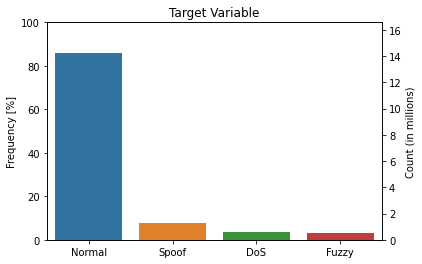

In [10]:
# plotting the target variable
labelCount = data[4].value_counts(normalize=True)*100
ax = sns.barplot(x=labelCount.index, y=labelCount.values)
ax1 = ax.twinx()
ax.set_ylabel('Frequency [%]')
ax1.set_ylabel("Count (in millions)")
ax1.set_ylim(0, len(data)/10**6)
ax.set_ylim(0, 100)
plt.title('Target Variable')

<AxesSubplot:xlabel='DLC', ylabel='Count'>

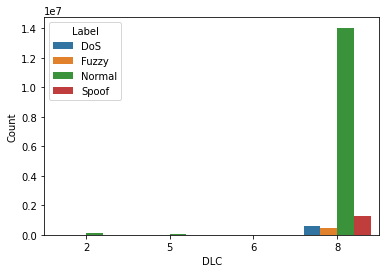

In [17]:
# DLC vs Labels
data['Label'] = data[4]
data['DLC'] = data[3]
cnt = pd.crosstab(data['DLC'], data['Label'])
cnt = cnt.stack().reset_index().rename(columns={0: 'Count'})
sns.barplot(x=cnt['DLC'], y=cnt['Count'], hue=cnt['Label'])

<AxesSubplot:>

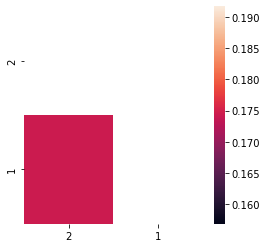

In [13]:
# correlation between CAN ID and DATA
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.subplots(figsize=(4,4))
sns.heatmap(corr, mask=mask)

In [ ]:
data.to_csv('../data/intravehicle.csv',index=False)